## INFO-F-413 - Data Structures and Algorithms - 2022

## Assignment 2: Bloom Filters

### Name: Hoang Hai Nam
### M. No.: 443146

Python version used and tested : 3.8.12

Imported libraries: random, bitarray, matplotlib, timeit


# 1. Imports & Libraries

In [1]:
import timeit as ti
import matplotlib.pyplot as plt
import random as rd
import bitarray as bt

# 2. Functions

In [124]:
def plotruntime(f,r,trials=1,figsize=[7,7]):
    Times=[ti.timeit(lambda:f(n),number=trials)/trials for n in r]
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(r,Times)
    ax.set_xlabel("Value of n")
    ax.set_ylabel("Runtime")

    
def plotruntimes(functions,labels,r,trials=1,figsize=[7,7]):
    fig, ax = plt.subplots(figsize=figsize)
    for f,l in zip(functions,labels):
        Times=[ti.timeit(lambda:f(n),number=trials)/trials for n in r]
        ax.plot(r,Times,label=l)
    ax.set_xlabel("Value of n")
    ax.set_ylabel("Runtime")
    ax.set_title("Runtime plot: "+str(trials)+" trial"+("s" if trials>1 else ""))
    ax.legend()


In [118]:
def samset(U, n=100):
    """Randomly samples n samples from a universe set U"""
    return rd.sample(sorted(U), n)


def hashfac(y, k):
    res = []
    for j in range(1, k + 1):
        res.append(hash(y) * j + 2)
    return res


def bloomer(X, m, k=False):
    """X: Sample set
    m: bloom filter bit array size
    k: number of hash functions
    Output: Bitarray bloomfilter"""
    # if k is not specified have as many hash functions as possible
    if not k:
        k = m
    # initialise empty bit array of size "Universe size"
    B = bt.bitarray(m)
    B.setall(0)
    if k > m + 1:
        print("ERR: too many hash functions for universe size/ bit array size")
        return
    for i in range(len(X)):
        for y in hashfac(X[i], k):
            B[y % m] = 1
    return B


def memship(B, y, k):
    """Inputs:
    B: bloomfilter bitarray
    y: query
    k: number of hash functions"""
    m = len(B)
    # check membership of element y in bloom filter B
    for y in hashfac(y, k):
        if B[y % m] == 0:
            return False
    return True


def accbench(U, n, m, k, loops=1000, verbose=False):
    """ Benchmarks the accuracy of a bloomfilter
    Inputs:
    U: universe set
    n: subset size
    m: bitarray size
    k: number of hash functions
    loops: number of trials
    """
    if k > m + 1:
        print("ERR: too many hash functions for universe size/ bit array size")
        return
    fp = 0
    X = samset(U, n)
    B = bloomer(X, m, k)
    for i in range(loops):
        y = rd.choice(sorted(U))
        # if membership says maybe but the element is actually not in X(i.e: false positives)
        if (memship(B, y, k)) != (y in X):
            fp += 1
    acc = 1 - (fp / loops)
    if verbose:
        print("After", loops, "number of trials, there were", fp, "false positives")
        print("Run ended with accuracy of", acc)
    return acc


def optik(n, m):
    return mt.trunc((m / n) * mt.log(2))


def plotaccuracyk(U, n, m, k=range(1,500), loops=1000, figsize=[7, 7]):
    fig, ax = plt.subplots(figsize=figsize)
    accs = []
    for i in k:
        accs.append(accbench(U, n, m, i, loops=loops))
    ax.plot(k, accs, label="Accuracy")
    ax.set_xlabel("Value of k")
    ax.set_ylabel("Accuracy")
    ax.set_title("Accuracy of different values of k")
    ax.legend()


def plotaccuracyn(U, m, k, n=range(1, 250), loops=1000, figsize=[7, 7]):
    fig, ax = plt.subplots(figsize=figsize)
    accs = []
    for i in n:
        accs.append(accbench(U, i, m, k, loops=loops))
    ax.plot(n, accs, label="Accuracy")
    ax.set_xlabel("Value of n")
    ax.set_ylabel("Accuracy")
    ax.set_title("Accuracy of different values of n")
    ax.legend()


def plotaccuracym(U, n, k, m=range(1, 500), loops=1000, figsize=[7, 7]):
    fig, ax = plt.subplots(figsize=figsize)
    accs = []
    for i in m:
        accs.append(accbench(U, n, i, k, loops=loops))
    ax.plot(m, accs, label="Accuracy")
    ax.set_xlabel("Value of m")
    ax.set_ylabel("Accuracy")
    ax.set_title("Accuracy of different values of m")
    ax.legend()
    
    
def bloomhelper(U, B, k, n=1000):
    for i in range(n):
        memship(B, rd.choice(sorted(U)), k)
    return


def verhelper(X, U, n=1000):
    res = True
    for i in range(n):
        if rd.choice(sorted(U)) in X:
            res = True  # kill me this is the worst thing i've done
    return

# 3. Validation

In [78]:
import random as rd
import bitarray as bt
import math as mt

textfile = open('cernrip.txt', mode='r', encoding="utf-8")
# Cleaning text
text = textfile.read()
text = text.replace(",", "").replace(".", "").replace("(", "").replace(")", "").replace(":", "").strip().split()
textfile.close()
uniset = set(text)
print("Universe size is:", len(uniset))


Universe size is: 954


In [79]:
N=100
M=1000
X = samset(uniset, 10)
B = bloomer(X, M, k=50)
Q = rd.choice(sorted(uniset))
print(X)
print("querying [", Q, "] bloom filter says", memship(B, Q, 50), ", actual answer is", Q in X)

['strength', 'separators', 'In', 'be', 'among', 'Pre-accelerator', 'T', 'cast', 'operational', 'complex']
querying [ Accelerator ] bloom filter says False , actual answer is False


In [116]:
print(accbench(uniset, n=100, m=10000, k=69, verbose=True))

After 1000 number of trials, there were 15 false positives
Run ended with accuracy of 0.985
0.985


# 4. Implementation

<div style="text-align: justify">
For the dataset I decide to use a the wikitext of CERN's Proton Synchrotron and pass it as a set of different strings of words.

https://en.wikipedia.org/wiki/Proton_Synchrotron
</div>

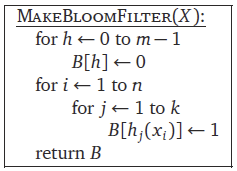
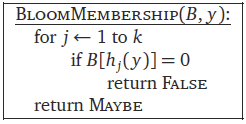

<div style="text-align: justify">
For the hashing i used modulo operator to select the buckets, after relying on python's built in hash function to uh, hash the objects. 
My possibly naive hash function uses the formula as follows:
</div>



<div style="text-align: justify">
in which h is my hash function, j as the hash function indices, x is the object and m as the size of the bitarray.
    
As for the bloomfilters themselves, the filters are stored as bitarray objects, the implementation to make bloom filters as well as membership verification is effectively identical to the pseudocodes described by Jeff Erickson.
    
</div>

<div style="text-align: justify">
As for accuracy benchmarking, a subset $X$ is generated by subsampling $n$ number of elements from the Universe $U$. Then random elements from the $U$ is looked up through our bloom filter $B$ generated from $X$, using python's built-in set functionality we can verify the correct answer of our Bloom Filter. 
</div>

# 5. Findings & Discussions

<div style="text-align: justify">
For our testing let's establish a base case of n=100, m=10000, k(optimal) = 69, and vary our variables around these values.
</div>

## 5.1 Rundown of m and n values

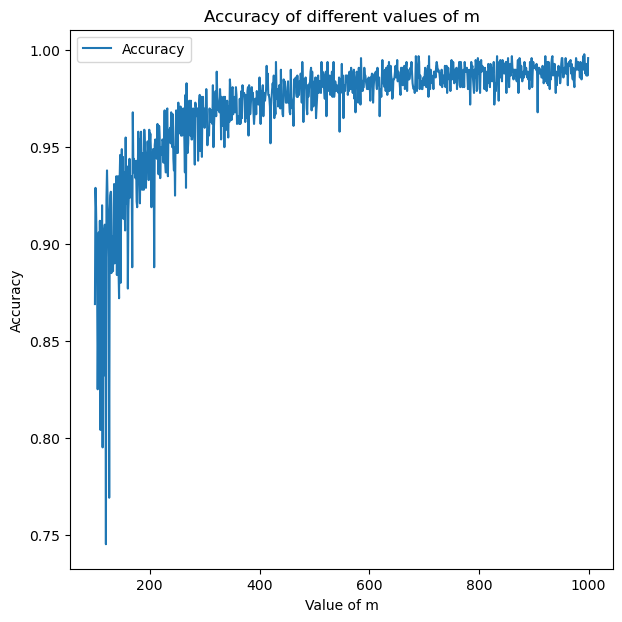

In [108]:
plotaccuracym(uniset, n=10, m=range(100,1000),k=6, loops=1000, figsize=[7, 7])

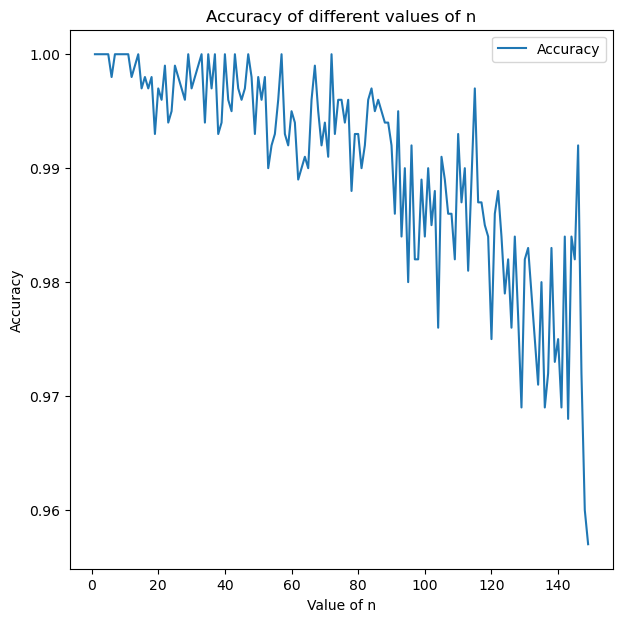

In [102]:
plotaccuracyn(uniset, n=range(1,150), m=10000,k=69, loops=1000, figsize=[7, 7])

<div style="text-align: justify">
This validates our theory that our false positives rate increases with $n$ and decreases with $m$. As stated before, the more bits are used to store our information in our bit array(which is tied to how many items we want to store in our bloom filter $n$ as well as how much each item use $k$) the more collisions occur and the less accurate we are.
</div>

## 5.2 "Optimal" K-value

The optimal calculated k value is 69


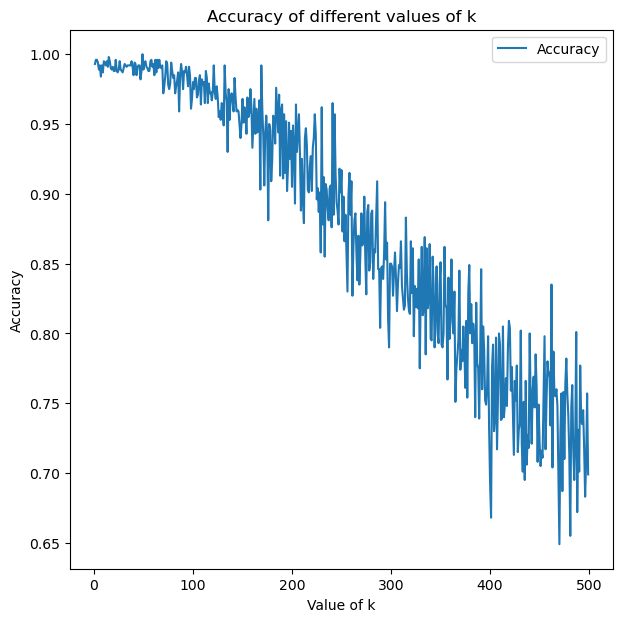

In [85]:
plotaccuracyk(uniset, n=100, m=10000,k=range(1,500), loops=1000, figsize=[7, 7])
print("The optimal calculated k value is", optik(100,10000))

<div style="text-align: justify">
First let's look at a typical runcase of $n$ = 100 and $m$ = 10000, with $k$ varying from 1 to 500. We can see a downward trend as the number of hash functions increases, which in turn uses more bits to store in our Bloom filter. This drop in accuracy is due to the amount of collisions as our Bloom filter is saturated.
</div>

In [87]:
print(accbench(uniset, n=100, m=100, k=90, verbose=True))

After 1000 number of trials, there were 885 false positives
Run ended with accuracy of 0.11499999999999999
0.11499999999999999


<div style="text-align: justify">
We can verify this by benchmarking with a $k$ value that will saturate our bitarray. While this does makes sense on a basic note, let's explore the theoretical optimal $k$.
</div>

Using Erikson's estimation..

$k = \frac{m}{n}*ln2$

In [97]:
print("The optimal calculated k value is", optik(10,2000))

The optimal calculated k value is 103


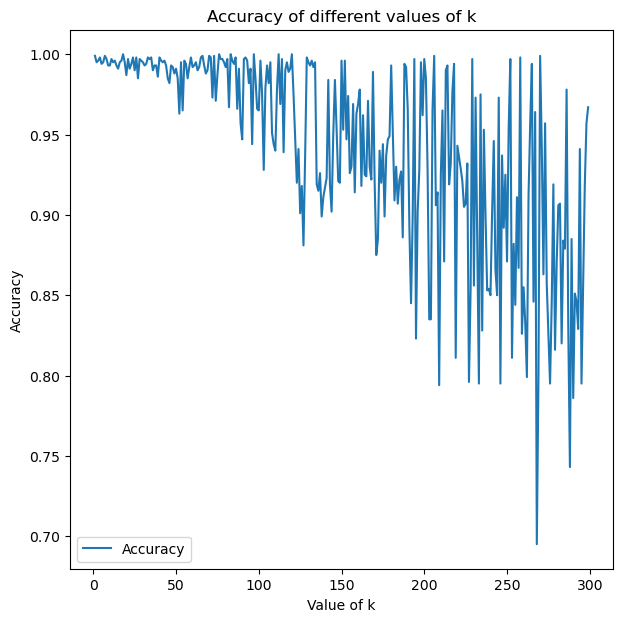

In [111]:
plotaccuracyk(uniset, n=10, m=2000,k=range(1,300), loops=1000, figsize=[7, 7])

<div style="text-align: justify">
Unfortunately while playing with many different proportion values of $n$ and $m$ I could not observe the symmetry around the optimal $k$ value at 103. Here and with every subsequent analysis with $k$ the optimal value only "suggests"(and a somewhat inconsistent predictor) of where k becomes too high and saturation sets in. Unfortunately I could not verify the optimal estimation of the $k$ value. It could be due to my implementation of the hash function or due to the chaotic nature of randomness selecting a query. As such our k-value even lower than optimal still gives good or better result.
</div>

## 5.3 Runtime

In [119]:
N=100
M=1000
X = samset(uniset, 10)
B = bloomer(X, M, k=50)

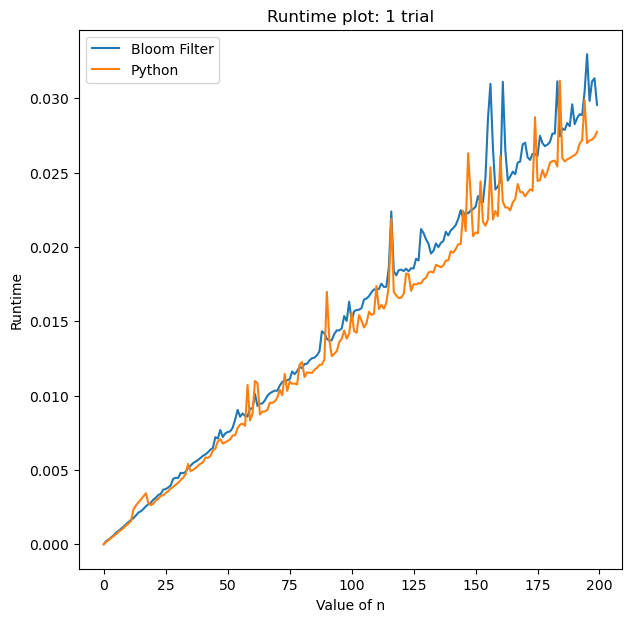

In [126]:
plotruntimes([lambda n:bloomhelper(uniset, B, 69, n=n),
              lambda n:verhelper(X, uniset, n=n)],
             ["Bloom Filter","Python"],range(0,200))

<div style="text-align: justify">
While the point of bloom filter is to save memory through hashing, I was curious if there's significantly more cost when it comes to querying. This compares looking up bloom filter membership (which hashes the query) and python's built-in function. There's a flat but minimal runtime cost added to the bloom filter method, however there's no doubt a big reduction in memory.
</div>

# 6. Conclusions

<div style="text-align: justify">
While Bloom filters are undoubtably more efficient in memory, there is a downside to this, which is the false positive cases. However as explained by Erikson, this false positive rate can be minimalised through optimising different parameters. Specifically the number of samples in our set, the number of hashing functions, and the bit array size. While in the real world deciding how much to store (our set size $n$) is rather impractical,  we can definitely vary the other parameters. As expected, the more our bitarray is filled either due to hashing more or having more samples, the more collisions occur and the higher our false positive rate is, this can be avoided by making the bitarray bigger (higher $m$), having less samples (lower $n$) or hashing less (lower $k$). Unfortunately Erikson's estimation on an optimal value of $k$ (number of hash functions) is unverified, possibly due to the chaotic nature of randomness in our sampling.
</div>